## Analysis of Language Model Outputs

This notebook contains the analysis of outputs from GPT-3.5 (OpenAI) and PaLM2 (Bard) based on the financial news data to poem snippets. this analysis indicates how well the large language models adapt to the new topic than the already seen topic.

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Load the new Excel file
data_fp = pd.read_excel('/content/finalpromptsf_to_p.xlsx')

# Display the first few rows of the new dataset
data_fp.head()

,Prompt,Label,Predicted label (GPT3.5),Context Learning,Predicted label (PaLM2),Context learning
0,Your task is to do the classification. I will ...,positive,no impact,0,no impact,0
1,Your task is to do the classification. I will ...,positive,no result,0,no impact,0
2,Your task is to do the classification. I will ...,negative,no result,0,no impact,0
3,Your task is to do the classification. I will ...,negative,no result,0,no impact,1
4,Your task is to do the classification. I will ...,negative,no result,0,no impact,1


In [ ]:
# Ground truth labels for the new dataset
ground_truth_fp = data_fp["Label"]

# Predicted labels for GPT-3.5 in the new dataset
predicted_gpt_fp = data_fp["Predicted label (GPT3.5)"]

# Calculate metrics for GPT-3.5 in the new dataset
accuracy_gpt_fp = accuracy_score(ground_truth_fp, predicted_gpt_fp)
f1_gpt_fp = f1_score(ground_truth_fp, predicted_gpt_fp, average='weighted', zero_division=1)
precision_gpt_fp = precision_score(ground_truth_fp, predicted_gpt_fp, average='weighted', zero_division=1)
recall_gpt_fp = recall_score(ground_truth_fp, predicted_gpt_fp, average='weighted', zero_division=1)

accuracy_gpt_fp, f1_gpt_fp, precision_gpt_fp, recall_gpt_fp


(0.06, 0.0909090909090909, 0.39, 0.06)

In [ ]:
# Predicted labels for PaLM2 in the new dataset
predicted_palm_fp = data_fp["Predicted label (PaLM2)"]

# Calculate metrics for PaLM2 in the new dataset
accuracy_palm_fp = accuracy_score(ground_truth_fp, predicted_palm_fp)
f1_palm_fp = f1_score(ground_truth_fp, predicted_palm_fp, average='weighted', zero_division=1)
precision_palm_fp = precision_score(ground_truth_fp, predicted_palm_fp, average='weighted', zero_division=1)
recall_palm_fp = recall_score(ground_truth_fp, predicted_palm_fp, average='weighted', zero_division=1)

accuracy_palm_fp, f1_palm_fp, precision_palm_fp, recall_palm_fp


(0.16, 0.16126361655773422, 0.655, 0.16)

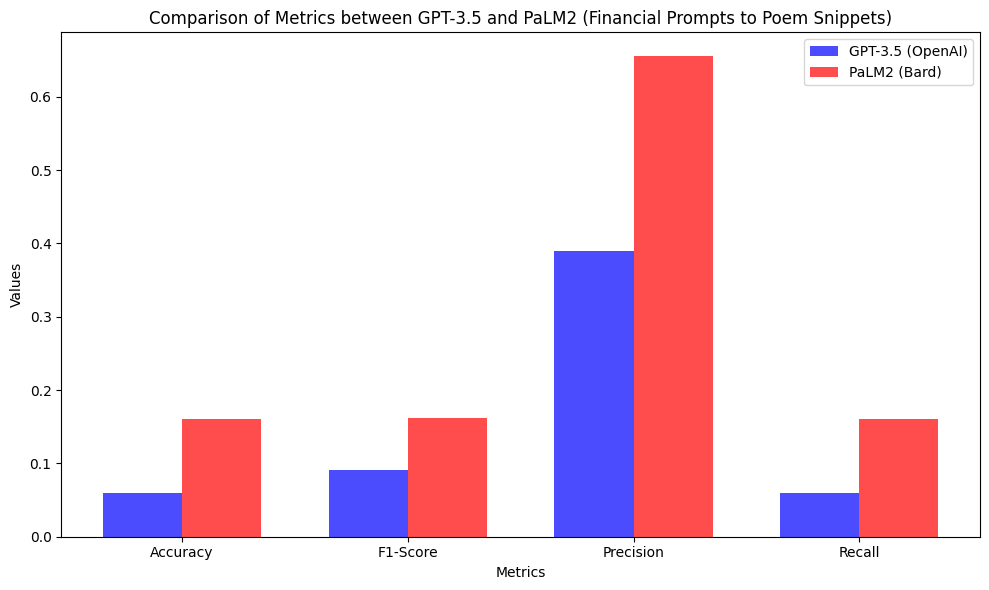

In [ ]:
# Metrics data for the new dataset
gpt_values_fp = [accuracy_gpt_fp, f1_gpt_fp, precision_gpt_fp, recall_gpt_fp]
palm_values_fp = [accuracy_palm_fp, f1_palm_fp, precision_palm_fp, recall_palm_fp]
index = np.arange(4)  # For 4 metrics
bar_width = 0.35  # Width of each bar
labels =["Accuracy", "F1-Score","Precision","Recall"]
# Create bar chart for the new dataset
fig, ax = plt.subplots(figsize=(10, 6))
bar1_fp = ax.bar(index, gpt_values_fp, bar_width, label='GPT-3.5 (OpenAI)', color='b', alpha=0.7)
bar2_fp = ax.bar(index + bar_width, palm_values_fp, bar_width, label='PaLM2 (Bard)', color='r', alpha=0.7)

# Label the chart for the new dataset
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Metrics between GPT-3.5 and PaLM2 (Financial Prompts to Poem Snippets)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Context Learning Analysis for GPT-3.5 in the new dataset
gpt_context_learning_fp = data_fp["Context Learning"].mean()

# Context Learning Analysis for PaLM2 in the new dataset
palm_context_learning_fp = data_fp["Context learning"].mean()

gpt_context_learning_fp, palm_context_learning_fp


(0.1, 0.8)

In [ ]:
# Misclassification Analysis for GPT-3.5 in the new dataset
gpt_misclassified_fp = data_fp[data_fp["Label"] != data_fp["Predicted label (GPT3.5)"]]
gpt_misclassification_counts_fp = gpt_misclassified_fp["Predicted label (GPT3.5)"].value_counts()

# Misclassification Analysis for PaLM2 in the new dataset
palm_misclassified_fp = data_fp[data_fp["Label"] != data_fp["Predicted label (PaLM2)"]]
palm_misclassification_counts_fp = palm_misclassified_fp["Predicted label (PaLM2)"].value_counts()

gpt_misclassification_counts_fp, palm_misclassification_counts_fp


(no result    30
 no impact    12
 positive      4
 negative      1
 Name: Predicted label (GPT3.5), dtype: int64,
 no result    25
 no impact    15
 positive      2
 Name: Predicted label (PaLM2), dtype: int64)

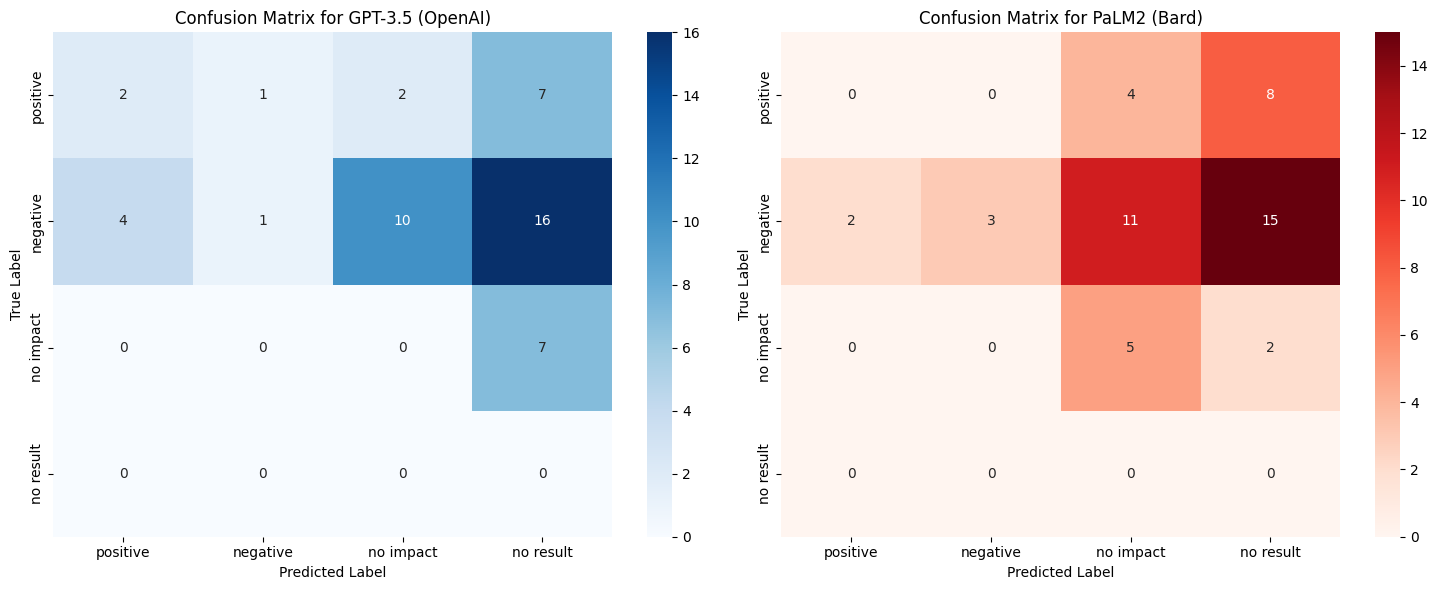

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrices for the new dataset
confusion_gpt_fp = confusion_matrix(ground_truth_fp, predicted_gpt_fp, labels=['positive', 'negative', 'no impact', 'no result'])
confusion_palm_fp = confusion_matrix(ground_truth_fp, predicted_palm_fp, labels=['positive', 'negative', 'no impact', 'no result'])

# Plotting confusion matrices for the new dataset
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(confusion_gpt_fp, annot=True, fmt='d', cmap='Blues', ax=ax[0],
            xticklabels=['positive', 'negative', 'no impact', 'no result'],
            yticklabels=['positive', 'negative', 'no impact', 'no result'])
ax[0].set_title('Confusion Matrix for GPT-3.5 (OpenAI)')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

sns.heatmap(confusion_palm_fp, annot=True, fmt='d', cmap='Reds', ax=ax[1],
            xticklabels=['positive', 'negative', 'no impact', 'no result'],
            yticklabels=['positive', 'negative', 'no impact', 'no result'])
ax[1].set_title('Confusion Matrix for PaLM2 (Bard)')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()
